In [1]:
import pandas as pd
datafile=pd.read_csv("NetflixViewingHistory.csv")
datafile.head()

,Title,Date
0,Friends: Season 4: The One Where They're Going...,4/7/25
1,Friends: Season 4: The One with Chandler in a Box,4/7/25
2,Friends: Season 4: The One Where Chandler Cros...,4/6/25
3,"WWE SmackDown: 2025: April 4, 2025",4/5/25
4,"WWE SmackDown: 2025: January 3, 2025",4/5/25


In [10]:
datafile.columns

Index(['Title', 'Date', 'date'], dtype='object')

In [24]:
datafile['date']=pd.to_datetime(datafile['Date'])
datafile.dtypes

Title            object
Date     datetime64[ns]
date     datetime64[ns]
dtype: object

In [26]:
datafile['Year']=datafile['Date'].dt.year
datafile['Month']=datafile['Date'].dt.month_name()
datafile['Day']=datafile['Date'].dt.day_name()
datafile.head()

,Title,Date,date,Year,Month,Day
0,Friends: Season 4: The One Where They're Going...,2025-04-07,2025-04-07,2025,April,Monday
1,Friends: Season 4: The One with Chandler in a Box,2025-04-07,2025-04-07,2025,April,Monday
2,Friends: Season 4: The One Where Chandler Cros...,2025-04-06,2025-04-06,2025,April,Sunday
3,"WWE SmackDown: 2025: April 4, 2025",2025-04-05,2025-04-05,2025,April,Saturday
4,"WWE SmackDown: 2025: January 3, 2025",2025-04-05,2025-04-05,2025,April,Saturday


In [28]:
top_ones=datafile['Title'].value_counts().head()
top_ones

Title
Friends: Season 4: The One Where They're Going to Party    1
Friends: Season 2: The One with the List                   1
Cobra Kai: Season 6: Underdogs                             1
Friends: Season 1: The One with the Two Parts: Part 1      1
Friends: Season 1: The One with the Two Parts: Part 2      1
Name: count, dtype: int64

In [30]:
weekday_counts=datafile['Day'].value_counts()
weekday_counts

Day
Sunday       27
Thursday     26
Tuesday      21
Friday       19
Monday       14
Wednesday    14
Saturday     13
Name: count, dtype: int64

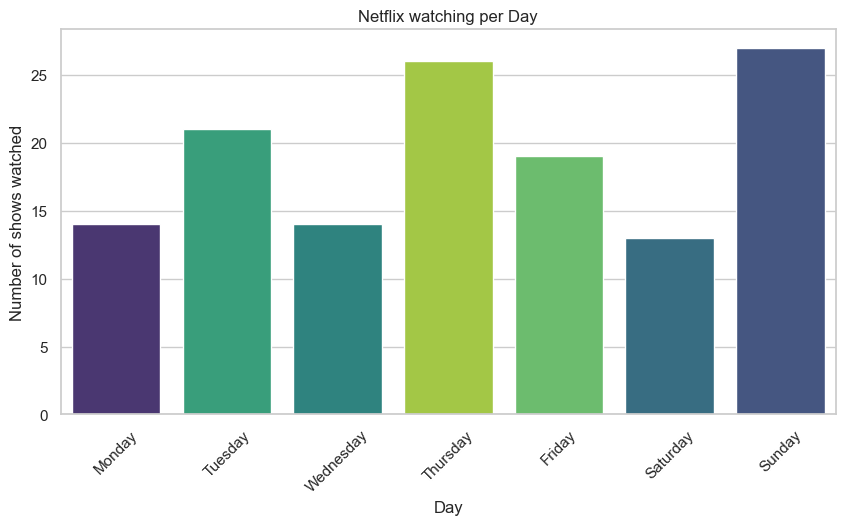

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
day_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
sns.countplot(data=datafile,x='Day',hue='Day',order=day_order,palette='viridis', legend=False)
plt.title('Netflix watching per Day')
plt.xlabel('Day')
plt.ylabel('Number of shows watched')
plt.xticks(rotation=45)
plt.show()


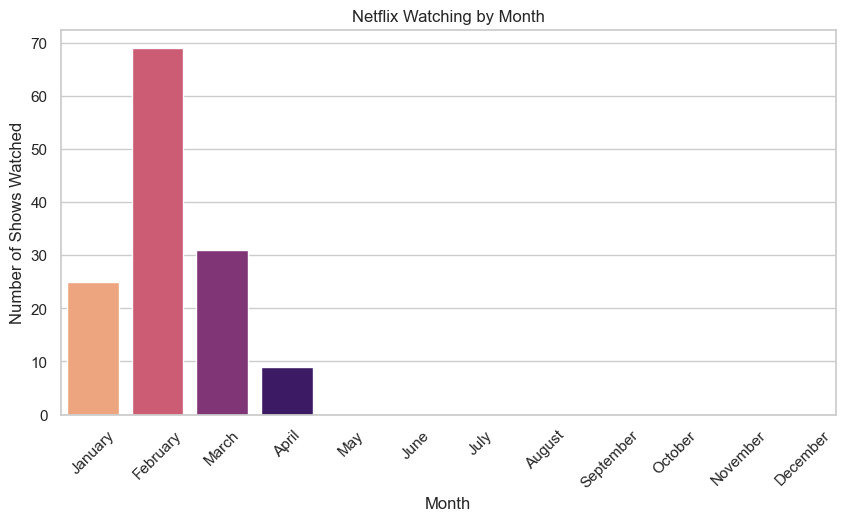

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
monthly=['January', 'February', 'March', 'April', 'May', 'June',
                 'July', 'August', 'September', 'October', 'November', 'December']
plt.figure(figsize=(10,5))
sns.countplot(data=datafile,x='Month',order=monthly,palette='magma',hue='Month',legend=False)
plt.title('Netflix Watching by Month')
plt.xlabel('Month')
plt.ylabel('Number of Shows Watched')
plt.xticks(rotation=45)
plt.show()

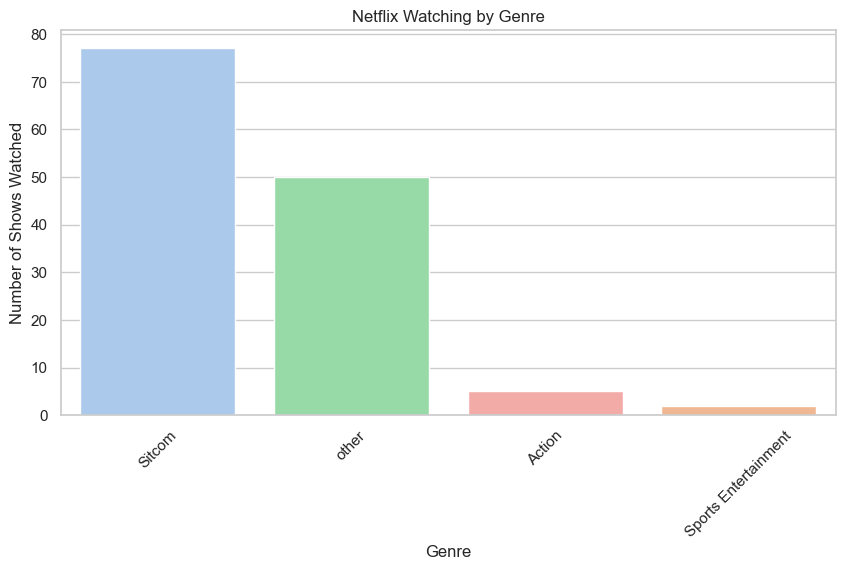

In [36]:
genre_map = {
    "Friends": "Sitcom",
    "Cobra Kai": "Action",
    "WWE": "Sports Entertainment",
    "Brooklyn Nine-Nine": "Comedy",
    "The Office": "Comedy",
    "Breaking Bad": "Drama",
    "Money Heist": "Thriller"
}

def get_genre(title):
    for key in genre_map:
        if key.lower() in title.lower():
            return genre_map[key]
    return "other"
datafile['Genre']=datafile['Title'].apply(get_genre)
plt.figure(figsize=(10,5))
sns.countplot(data=datafile, x='Genre', palette='pastel', order=datafile['Genre'].value_counts().index,hue='Genre',legend=False)
plt.title('Netflix Watching by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Shows Watched')
plt.xticks(rotation=45)
plt.show()

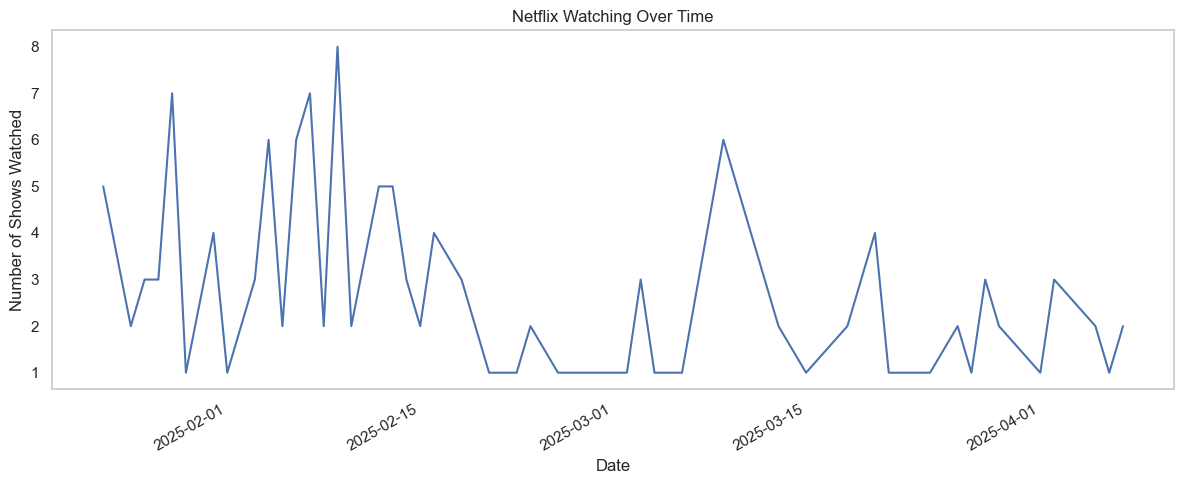

In [38]:
datafile['Date'] = pd.to_datetime(datafile['Date'])
daily_counts = datafile.groupby('Date').size()

# Plotting
plt.figure(figsize=(12,5))
daily_counts.plot()
plt.title('Netflix Watching Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Shows Watched')
plt.grid()
plt.tight_layout()
plt.show()

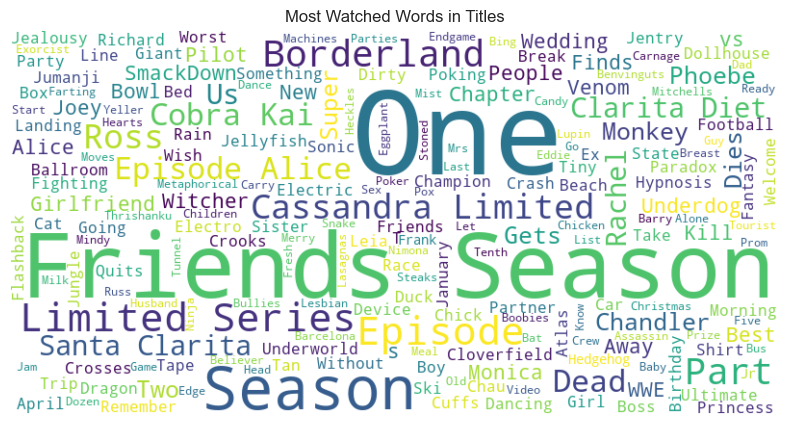

In [40]:

from wordcloud import WordCloud

# Combine all titles into one string
text = " ".join(title for title in datafile['Title'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display it
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Watched Words in Titles')
plt.show()

In [42]:
print("Total shows watched:", len(datafile))
print("Unique shows watched:", datafile['Title'].nunique())
print("Most watched day:", datafile['Day'].mode()[0])
print("Most watched month:", datafile['Month'].mode()[0])
print("Top 5 titles:\n", datafile['Title'].value_counts().head())

Total shows watched: 134
Unique shows watched: 134
Most watched day: Sunday
Most watched month: February
Top 5 titles:
 Title
Friends: Season 4: The One Where They're Going to Party    1
Friends: Season 2: The One with the List                   1
Cobra Kai: Season 6: Underdogs                             1
Friends: Season 1: The One with the Two Parts: Part 1      1
Friends: Season 1: The One with the Two Parts: Part 2      1
Name: count, dtype: int64


In [44]:
datafile.to_csv("cleaned_netflix_data.csv", index=False)
